In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

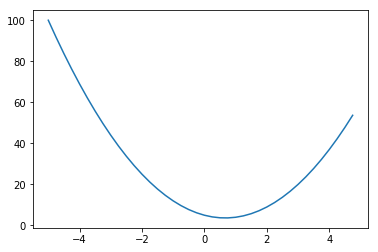

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [5]:
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [6]:
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

In [7]:
h = 0.00000000001
x = 3.0
(f(x + h) - f(x))/h

14.000178794049134

The derivative of 3*x**2 - 4*x + 5 is 6x - 4. 6*3-4=14

In [8]:
h = 0.00000000001
x = -3.0
(f(x + h) - f(x))/h

-21.999824184604222

In [9]:
h = 0.00000000001
x = 2/3
(f(x + h) - f(x))/h

0.0

Let's get more complex

In [10]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


Let's look at the derivatives

In [11]:
# The derivative of d with respect to a is d'=b

h = 0.0001

a = 2.0
b = -3.0
c = 10.0
d = a*b + c


d1 = a*b + c
a += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [12]:
# The derivative of d with respect to b is d'=a

h = 0.0001

a = 2.0
b = -3.0
c = 10.0
d = a*b + c


d1 = a*b + c
b += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [13]:
# The derivative of d with respect to c is d'=1

h = 0.0001

a = 2.0
b = -3.0
c = 10.0
d = a*b + c


d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


## Building out Micrograd

In [28]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label 

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')
        return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label = 'f')
L = d * f; L.label = 'L'

print(a + b)
print(a * b)
print(a*b + c)
print((a.__mul__(b)).__add__(c))

Value(data=-1.0)
Value(data=-6.0)
Value(data=4.0)
Value(data=4.0)


In [15]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [16]:
d._op

'+'

In [17]:
#brew install graphviz
#pip install graphviz
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    nodes, edges = trace(root)
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    
    for n in nodes:
        uid = str(id(n))
        
        dot.node(name=str(id(n)), label = "{  %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [18]:
L.grad = 1.0

# L = d*f
# dL/dd = f
d.grad = f.data
# dL/df = d
f.grad = d.data

# dd/dc ? 
# d = c + e 
# dd/dc = 1
# dd/de = 1
#
# WANT:
# dL/dc 
#
# KNOW:
# dL/dd
# dd/dc
# dL/dc = dL/dd*dd/dc
# dL/de = dL/dd*dd/de

c.grad = d.grad*1
e.grad = d.grad*1

# dL/da = dL/de*de/da
# dL/db = dL/de*de/db
# e = a*b
# de/da = b
# de/db = a

a.grad = e.grad*b.data # dL/da = dL/de*de/da
b.grad = e.grad*a.data # dL/db = dL/de*de/db

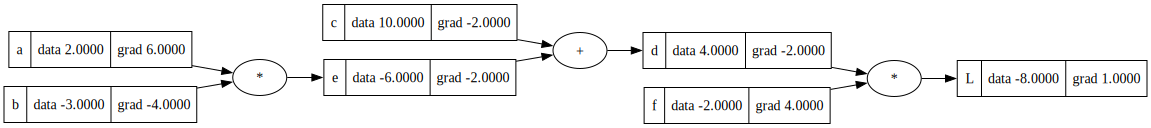

In [19]:
draw_dot(L)

In [20]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a*b
d = e+c
L = d*f

print(L.data)

-7.286496


In [23]:
# Function to test that the gradient manually
def lol():
    
    h = 0.0001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label = 'f')
    L = d * f; L.label = 'L'
    L1 = L.data
    
    a = Value(2.0 + h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label = 'f')
    L = d * f; L.label = 'L'
    L2 = L.data
    
    print((L2 - L1)/h)
    
lol()

6.000000000021544


### A Neuron

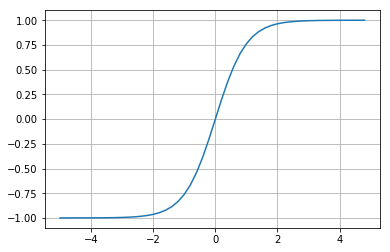

In [24]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

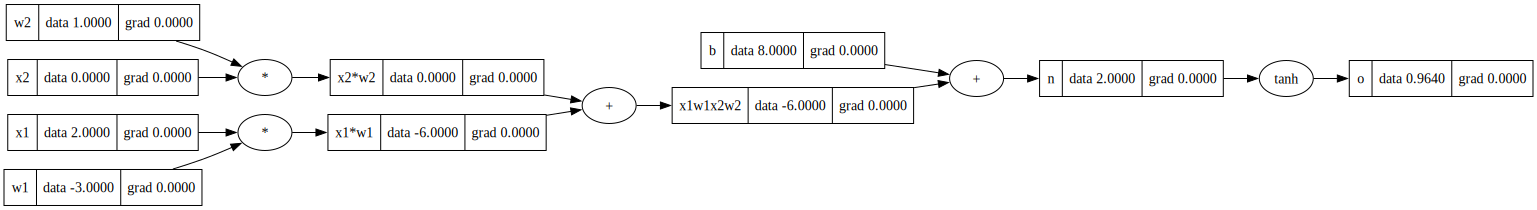

In [34]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(8.0, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1x2w2'
n = x1w1x2w2 + b; n.label='n'
o = n.tanh(); o.label = 'o'

draw_dot(o)

In [ ]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.881373587019432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1x2w2'
n = x1w1x2w2 + b; n.label='n'
o = n.tanh(); o.label = 'o'

In [39]:
# Backprop
o.grad = 1.0

In [52]:
# o = tanh(n)
# do/dn = 1 - tanh(n)**2
# do/dn = 1 - o**2
n.grad = 1 - o.data**2
n.grad

0.5000000000000784

In [53]:
x1w1x2w2.grad = n.grad
b.grad = n.grad

In [54]:
x1w1.grad = x1w1x2w2.grad
x2w2.grad = x1w1x2w2.grad

In [58]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

In [59]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

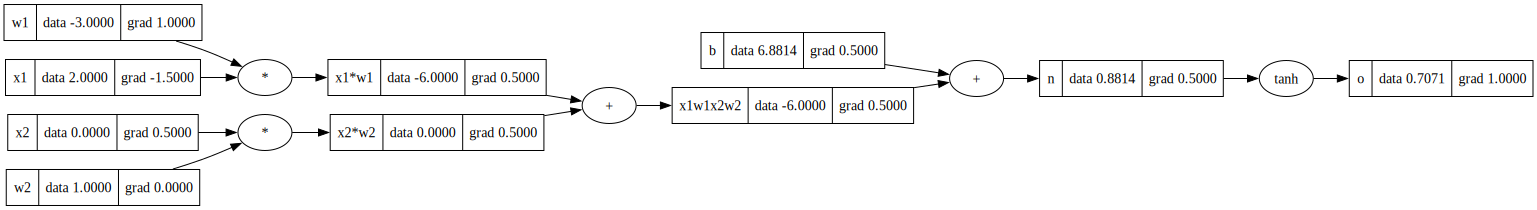

In [60]:
draw_dot(o)